# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
159934               2020-07-14           2020-07-14            2020-07-03   
159935               2020-07-14           2020-07-14            2020-06-26   
159936               2020-07-14           2020-07-14            2020-06-25   
159937               2020-07-14           2020-07-14            2020-07-09   
159938               2020-07-14           2020-07-14            2020-07-09   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
159934             2020-07-03 00:00:00                   NaT   
159935             2020-06-24 00:00:00                   NaT   
159936             2020-06-25 00:00:00                   NaT   
159937             2020-07-09 00:00:00                   NaT   
159938             2020-07-05 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación       Departamento  \
Id de caso                                                              
1                         NaT          Bogotá d.c.        Bogotá D.C.   
2                         NaT  Guadalajara de buga    Valle del Cauca   
3                         NaT             Medellín          Antioquia   
4                         NaT             Medellín          Antioquia   
5                         NaT             Medellín          Antioquia   
...                       ...                  ...                ...   
159934                    NaT         Barranquilla  Barranquilla D.E.   
159935                    NaT         Barranquilla  Barranquilla D.E.   
159936                    NaT         Barranquilla  Barranquilla D.E.   
159937                    NaT         Barranquilla  Barranquilla D.E.   
159938                    NaT         Barranquilla  Barranquilla D.E.   

           Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                        ...                              
1               Leve  Recuperado  ...               10 - 20    F   
2               Leve  Recuperado  ...               30 - 40    M   
3               Leve  Recuperado  ...               40 - 50    F   
4               Leve  Recuperado  ...               50 - 60    M   
5               Leve  Recuperado  ...               20 - 30    M   
...              ...         ...  ...                   ...  ...   
159934          Leve        Casa  ...               40 - 50    M   
159935          Leve        Casa  ...               20 - 30    M   
159936          Leve        Casa  ...               40 - 50    M   
159937      Moderado    Hospital  ...               60 - 70    M   
159938          Leve        Casa  ...               20 - 30    M   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro                 NaN    Importado   
4  

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                      F        M
Departamento                                                        
Amazonas                                             1021.0   1412.0
Antioquia                                            4413.0   6163.0
Arauca                                                 23.0    124.0
Archipiélago de San Andrés Providencia y Santa ...      8.0     21.0
Atlántico                                            7327.0   8573.0
Barranquilla D.E.                                    9044.0  10705.0
Bogotá D.C.                                         26427.0  26704.0
Bolívar                                               613.0    790.0
Boyacá                                                254.0    263.0
Buenaventura D.E.                                     651.0   1119.0
Caldas                                                173.0    132.0
Caquetá                                                54.0     70.0
Cartagena D.T. y C.                                  4990.0   6203.0
Casanare                                               43.0     88.0
Cauca                                                 342.0    464.0
Cesar                                                 741.0    843.0
Chocó                                                1018.0   1262.0
Cundinamarca                                         2259.0   2213.0
Córdoba                                               841.0    854.0
Guainía                                                 6.0      8.0
Guaviare                                                5.0     37.0
Huila                                                 217.0    217.0
La Guajira                                            446.0    538.0
Magdalena                                             599.0    645.0
Meta                                                  332.0   1337.0
Nariño                                               2135.0   2525.0
Norte de Santander                                    292.0    353.0
Putumayo                                               44.0     69.0
Quindío                                               114.0     90.0
Risaralda                                             422.0    378.0
Santa Marta D.T. y C.                                 875.0    882.0
Santander                                             520.0    911.0
Sucre                                                1275.0   1448.0
Tolima                                                436.0   1075.0
Valle del Cauca                                      6118.0   7244.0
Vaupés                                                 26.0     33.0
Vichada                                                 0.0      1.0

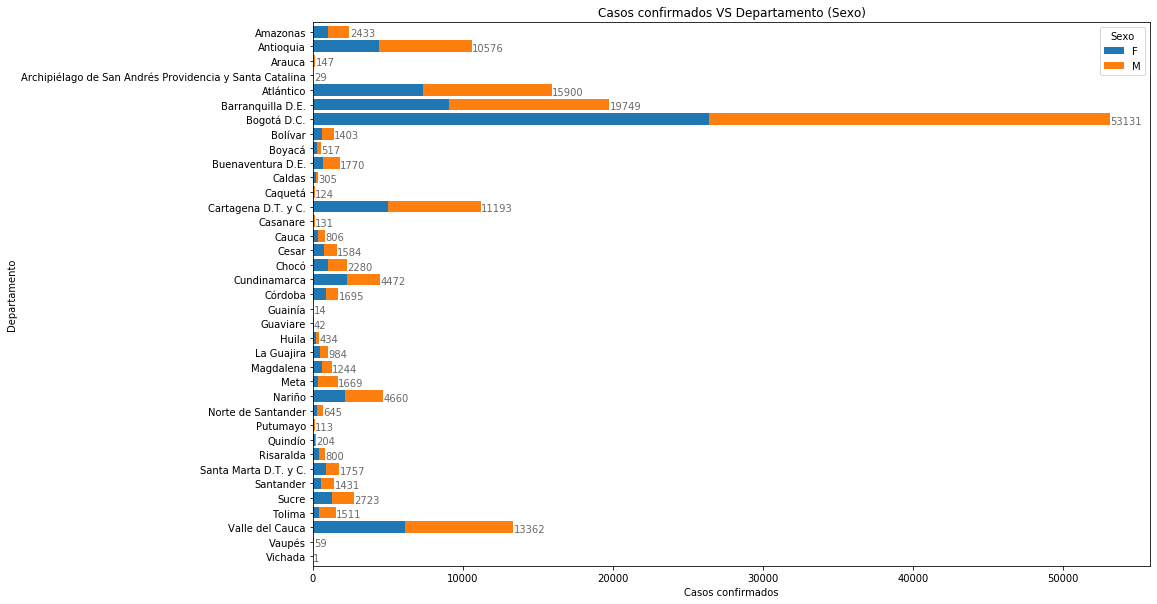

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               124      437      499   
Antioquia                                              375      847     2861   
Arauca                                                   3       33       61   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              657     1120     3521   
Barranquilla D.E.                                      669     1155     4332   
Bogotá D.C.                                           2582     4316    12211   
Bolívar                                                 66      134      312   
Boyacá                                                  29       51      102   
Buenaventura D.E.                                       34      247      410   
Caldas                                                  11       19       67   
Caquetá                                                  5        7       41   
Cartagena D.T. y C.                                    431      761     2593   
Casanare                                                 7        6       37   
Cauca                                                   42       65      175   
Cesar                                                  148      180      356   
Chocó                                                   94      199      541   
Cundinamarca                                           234      340     1039   
Córdoba                                                 77       93      330   
Guainía                                                  0        2        4   
Guaviare                                                 0       16        9   
Huila                                                   25       40       77   
La Guajira                                              39      106      240   
Magdalena                                               72       99      219   
Meta                                                    19      119      560   
Nariño                                                 238      428     1099   
Norte de Santander                                      32       29      153   
Putumayo                                                 2        9       21   
Quindío                                                  8       12       31   
Risaralda                                               56       77      166   
Santa Marta D.T. y C.                                   74      127      357   
Santander                                               44      144      383   
Sucre                                                  103      215      616   
Tolima                                                  47       85      528   
Valle del Cauca                                        465      959     3053   
Vaupés                                                   4        4       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                470      330      264   
Antioquia                                              2708     1565     1211   
Arauca                                                   36        7        4   
Archipiélago de San Andrés Providencia y Santa ...        9        6        3   
Atlántico                                              3765     2525     2078   
Barranquilla D.E.                                      4696     3068     2663   
Bogotá D.C.                                           11410     8455     7085   
Bolívar                                                 347      200      125   
Boyacá                                                   97       77 

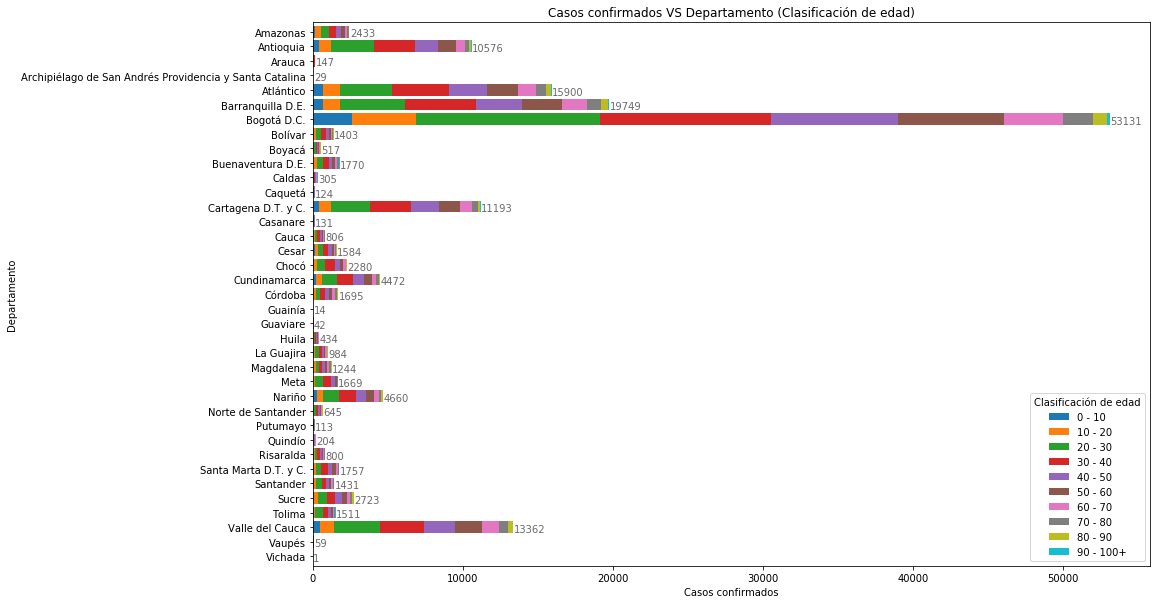

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              114.0      101.0   
Antioquia                                            6755.0      118.0   
Arauca                                                 81.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      7.0        0.0   
Atlántico                                            7265.0      777.0   
Barranquilla D.E.                                    8332.0     1166.0   
Bogotá D.C.                                         29681.0     1214.0   
Bolívar                                               576.0       66.0   
Boyacá                                                168.0       16.0   
Buenaventura D.E.                                     386.0      117.0   
Caldas                                                 57.0        7.0   
Caquetá                                                80.0        2.0   
Cartagena D.T. y C.                                  3862.0      390.0   
Casanare                                               66.0        1.0   
Cauca                                                 433.0       28.0   
Cesar                                                 541.0       37.0   
Chocó                                                 913.0       76.0   
Cundinamarca                                         1912.0      102.0   
Córdoba                                               750.0      213.0   
Guainía                                                 2.0        1.0   
Guaviare                                                4.0        0.0   
Huila                                                  79.0       13.0   
La Guajira                                            631.0       58.0   
Magdalena                                             457.0      128.0   
Meta                                                  524.0       17.0   
Nariño                                               1429.0      146.0   
Norte de Santander                                    331.0       28.0   
Putumayo                                               57.0       10.0   
Quindío                                                53.0        5.0   
Risaralda                                             331.0       21.0   
Santa Marta D.T. y C.                                 934.0       76.0   
Santander                                             829.0       30.0   
Sucre                                                1575.0      163.0   
Tolima                                                840.0       29.0   
Valle del Cauca                                      5574.0      468.0   
Vaupés                                                 37.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                10.0           7.0   
Antioquia                                              538.0          70.0   
Arauca                                                   3.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              595.0          97.0   
Barranquilla D.E.                                      884.0         120.0   
Bogotá D.C.                                           2919.0         157.0   
Bolívar                                                 78.0          10.0   
Boyacá                                                  34.0           2.0   
Buenaventura D.E.                                      114.0          18.0   
Caldas                                                  13.0           1.0   
Caquetá                                                 14.0           2.0   
Cartagena D.T. y C.  

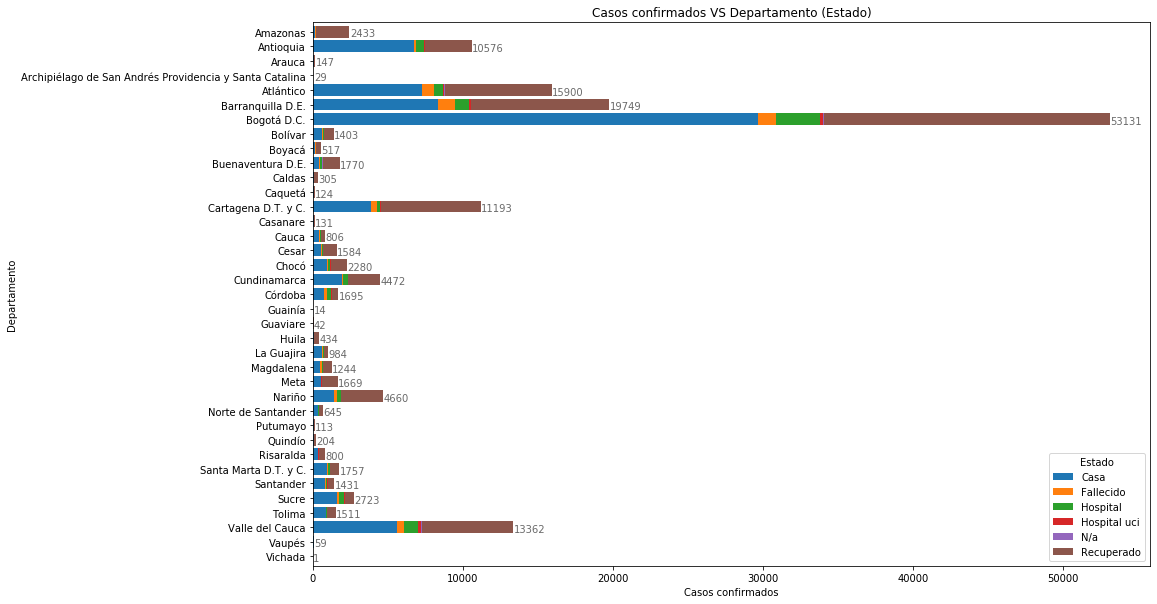

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          35950  39716
Fallecido      2136   3489
Hospital       3606   4863
Hospital uci    352    636
N/a             149    195
Recuperado    31911  36895

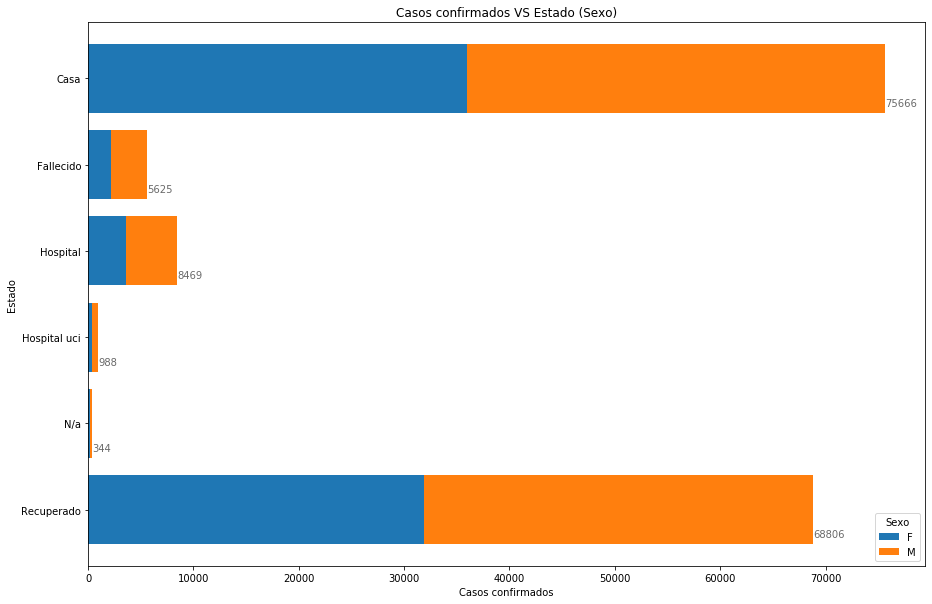

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3108     5889    19278    18781    12072     9228   
Fallecido                  12       12       79      208      460      864   
Hospital                  318      196      723     1117     1322     1722   
Hospital uci               46       24       41      109      141      219   
N/a                         9        7       13       16       24       41   
Recuperado               3323     6355    16897    16174    10683     8229   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      4529     1906      752        123  
Fallecido                 1328     1397     1020        245  
Hospital                  1509      991      496         75  
Hospital uci               223      130       49          6  
N/a                         75       77       64         18  
Recuperado                4270     1980      773        122

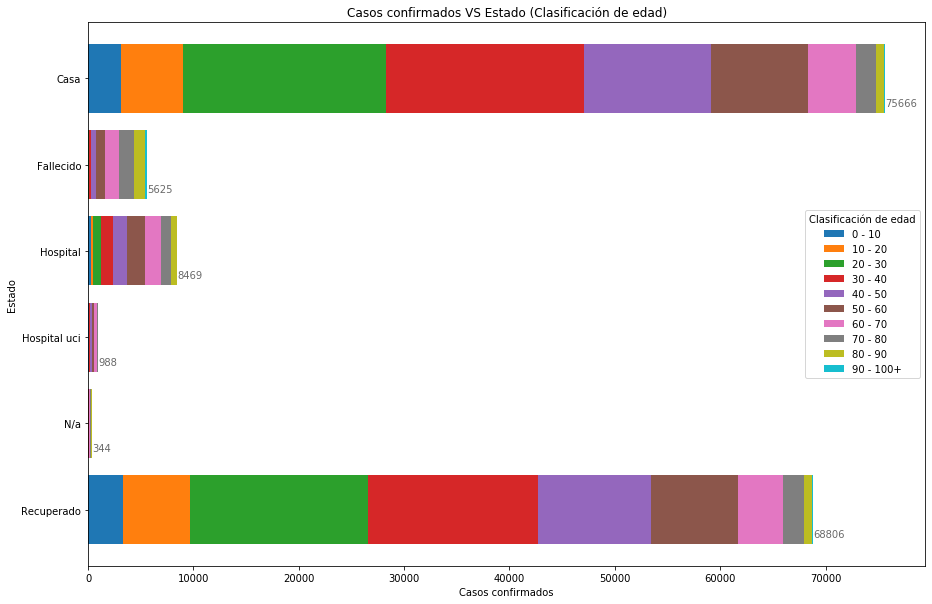

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   68348  74411
Importado      450    513
Relacionado   5306  10870

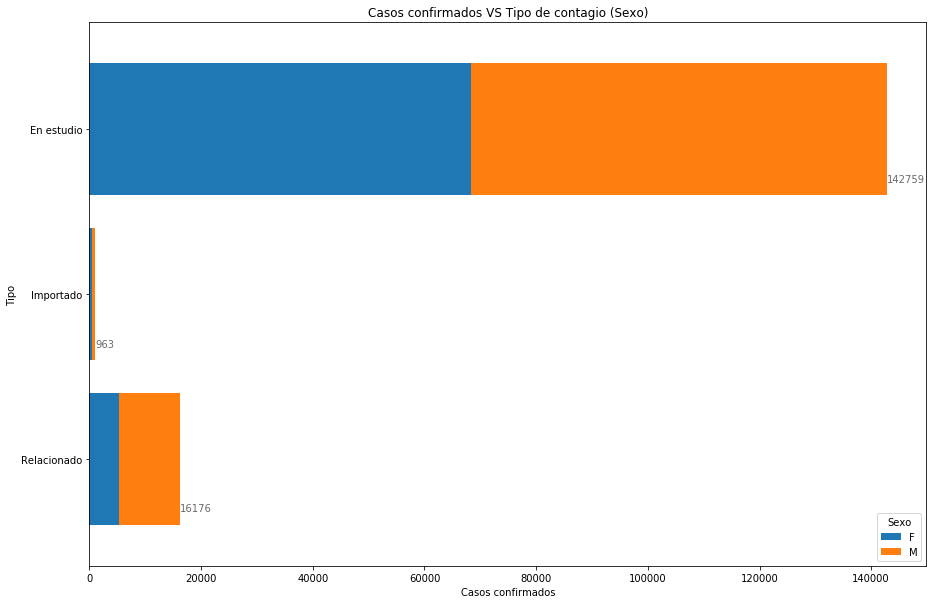

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               6007    10340    32287    32369    22448    18637   
Importado                   5       34      238      226      171      149   
Relacionado               804     2109     4506     3810     2083     1517   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               11078     6081     2965        547  
Importado                   95       35        9          1  
Relacionado                761      365      180         41

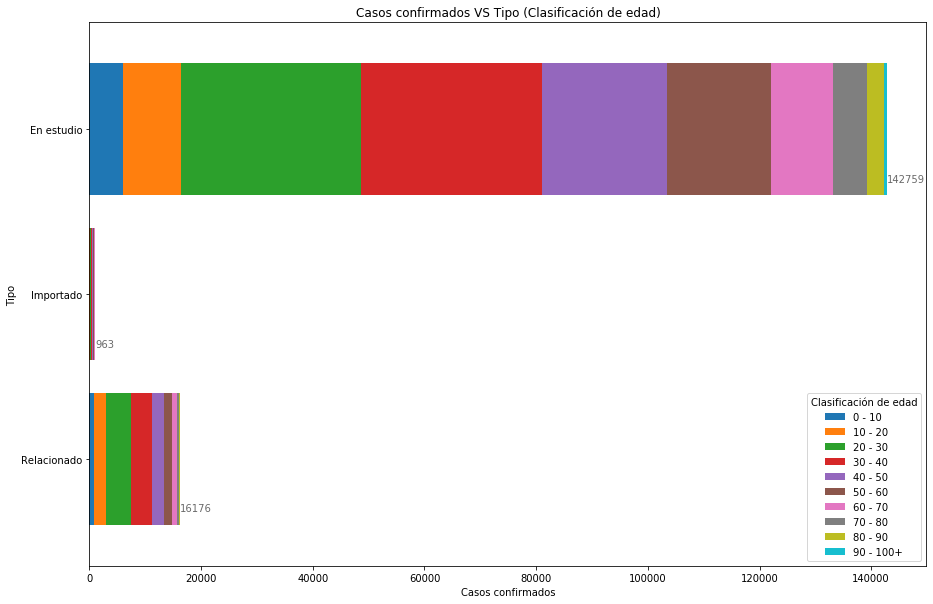

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  3460   3356
10 - 20                 5643   6840
20 - 30                17239  19792
30 - 40                16564  19841
40 - 50                11476  13226
50 - 60                 9386  10917
60 - 70                 5504   6430
70 - 80                 2928   3553
80 - 90                 1567   1587
90 - 100+                337    252

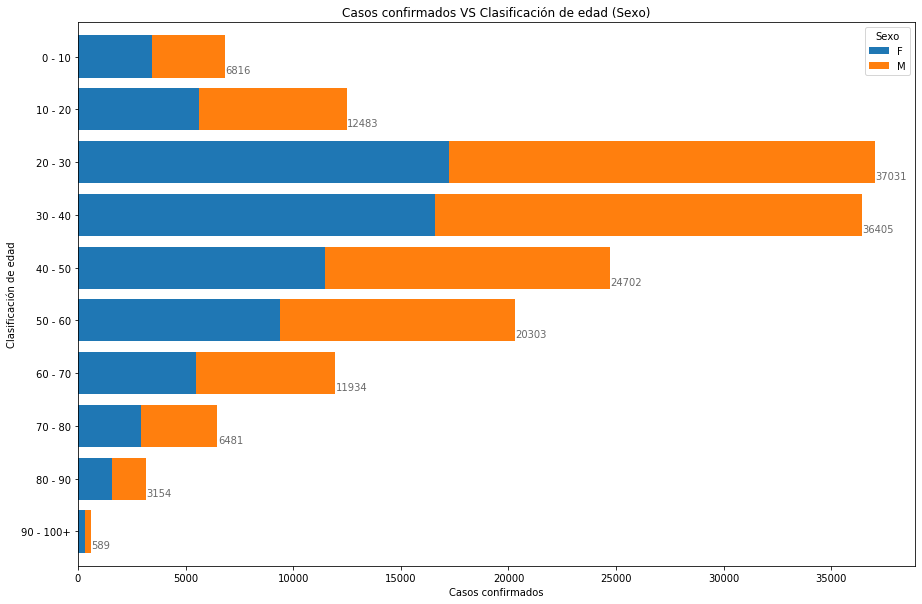

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3108         12       318            46    9   
10 - 20                 5889         12       196            24    7   
20 - 30                19278         79       723            41   13   
30 - 40                18781        208      1117           109   16   
40 - 50                12072        460      1322           141   24   
50 - 60                 9228        864      1722           219   41   
60 - 70                 4529       1328      1509           223   75   
70 - 80                 1906       1397       991           130   77   
80 - 90                  752       1020       496            49   64   
90 - 100+                123        245        75             6   18   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       3323  
10 - 20                      6355  
20 - 30                     16897  
30 - 40                     16174  
40 - 50                     10683  
50 - 60                      8229  
60 - 70                      4270  
70 - 80                      1980  
80 - 90                       773  
90 - 100+                     122

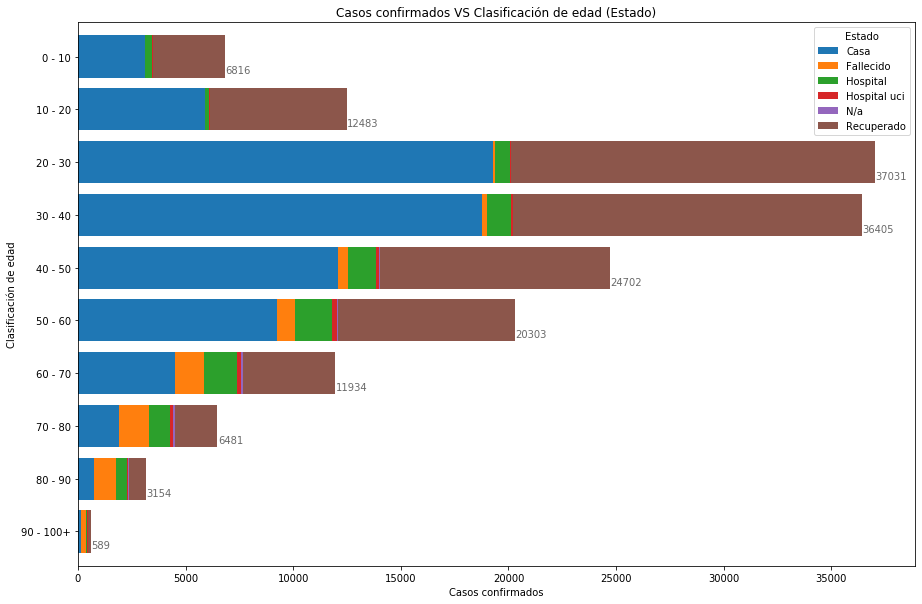

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-10            2929.0  3519.0
2020-07-11            2485.0  2774.0
2020-07-12            2074.0  2184.0
2020-07-13            2572.0  2786.0
2020-07-14            1634.0  1918.0

[128 rows x 2 columns]

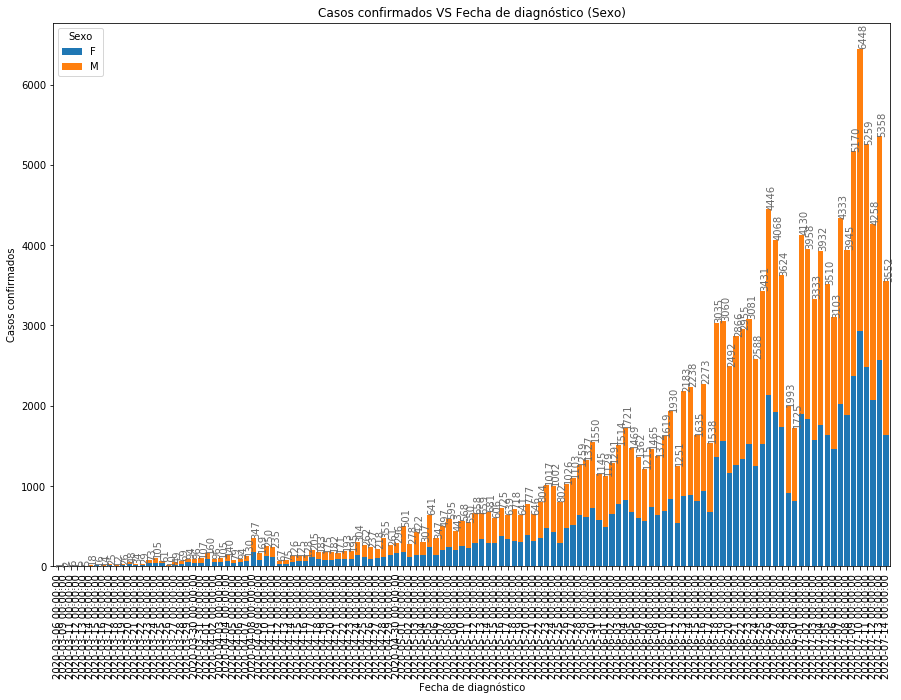

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-10                217      446     1563     1577      993      836   
2020-07-11                192      356     1252     1240      842      681   
2020-07-12                168      312      966      975      703      578   
2020-07-13                183      320     1247     1234      866      726   
2020-07-14                119      261      862      812      613      437   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-10                 435      253      105         23  
2020-07-11                 392      190      102         12  
2020-07-12                 315      158       71         12  
2020-07-13                 436      223      106         17  
2020-07-14                 248      118       72         10  

[128 rows x 10 columns]

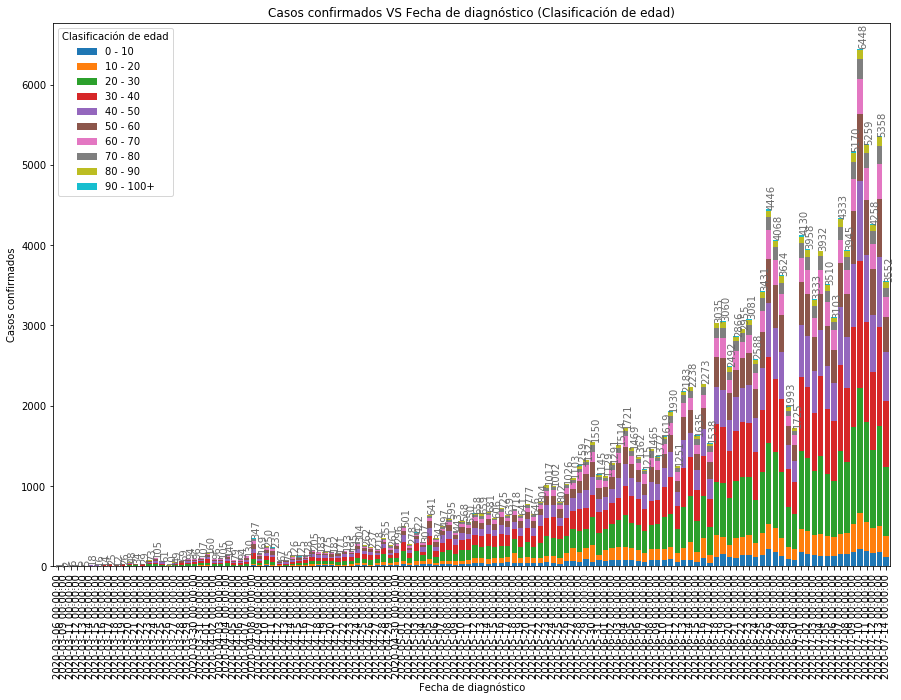

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-10            5987.0       96.0     329.0          22.0  6.0   
2020-07-11            4675.0      113.0     344.0          25.0  6.0   
2020-07-12            3838.0       74.0     318.0          23.0  1.0   
2020-07-13            4785.0       56.0     473.0          39.0  5.0   
2020-07-14            3311.0        6.0     215.0          20.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-10                   8.0  
2020-07-11                  96.0  
2020-07-12                   4.0  
2020-07-13                   0.0  
2020-07-14                   0.0  

[128 rows x 6 columns]

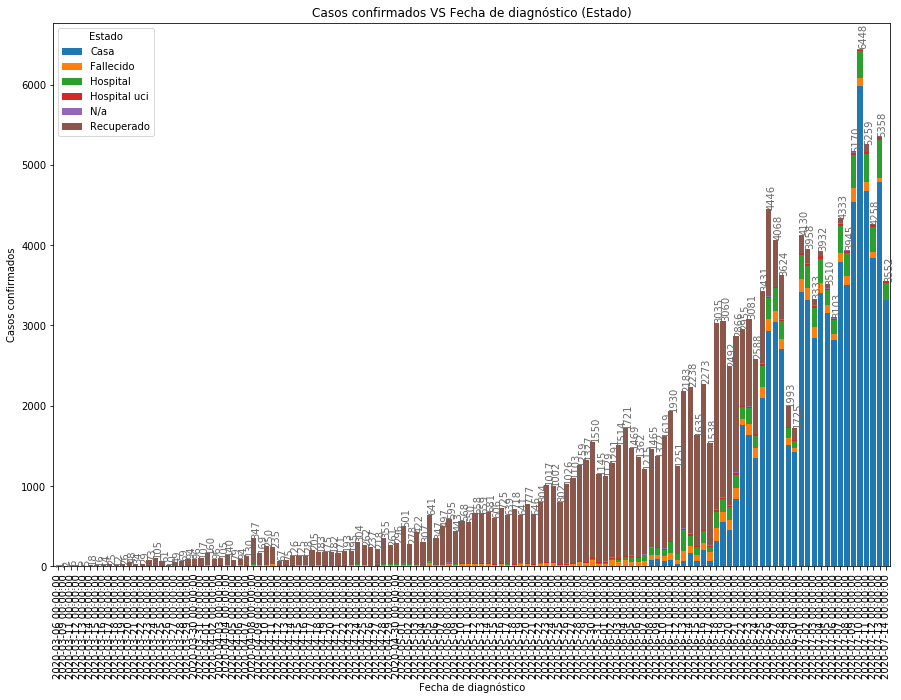

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F        M
Fecha de diagnóstico                  
2020-03-06                1.0      0.0
2020-03-09                2.0      1.0
2020-03-11                6.0      3.0
2020-03-12               11.0      3.0
2020-03-13               13.0      6.0
...                       ...      ...
2020-07-10            63633.0  74200.0
2020-07-11            66118.0  76974.0
2020-07-12            68192.0  79158.0
2020-07-13            70764.0  81944.0
2020-07-14            72398.0  83862.0

[128 rows x 2 columns]

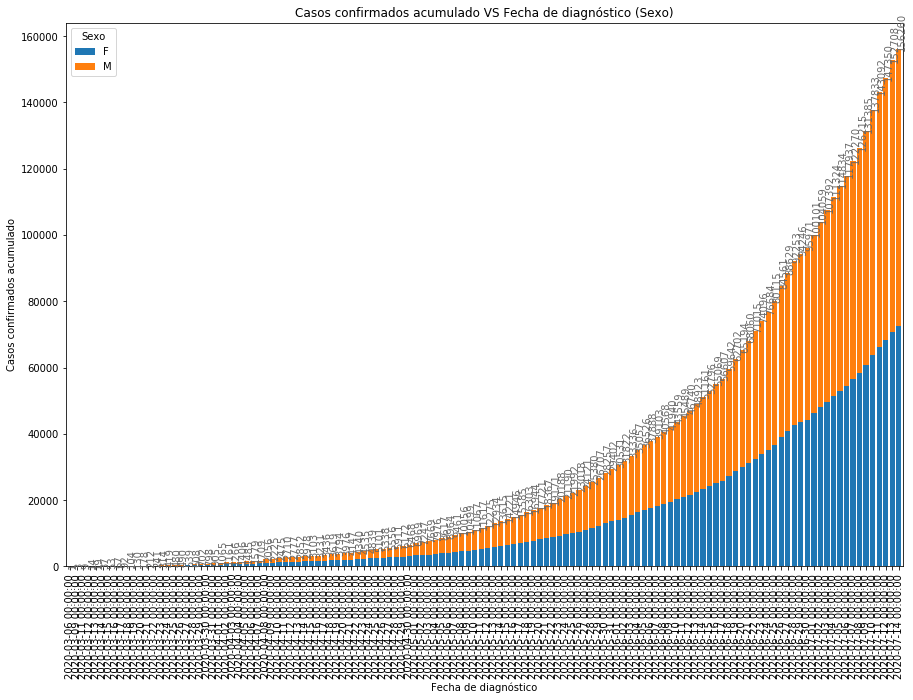

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-10               6026    10972    31838    31266    21145    17436   
2020-07-11               6218    11328    33090    32506    21987    18117   
2020-07-12               6386    11640    34056    33481    22690    18695   
2020-07-13               6569    11960    35303    34715    23556    19421   
2020-07-14               6688    12221    36165    35527    24169    19858   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-10               10267     5635     2720        528  
2020-07-11               10659     5825     2822        540  
2020-07-12               10974     5983     2893        552  
2020-07-13               11410     6206     2999        569  
2020-07-14               11658     6324     3071        579  

[128 rows x 10 columns]

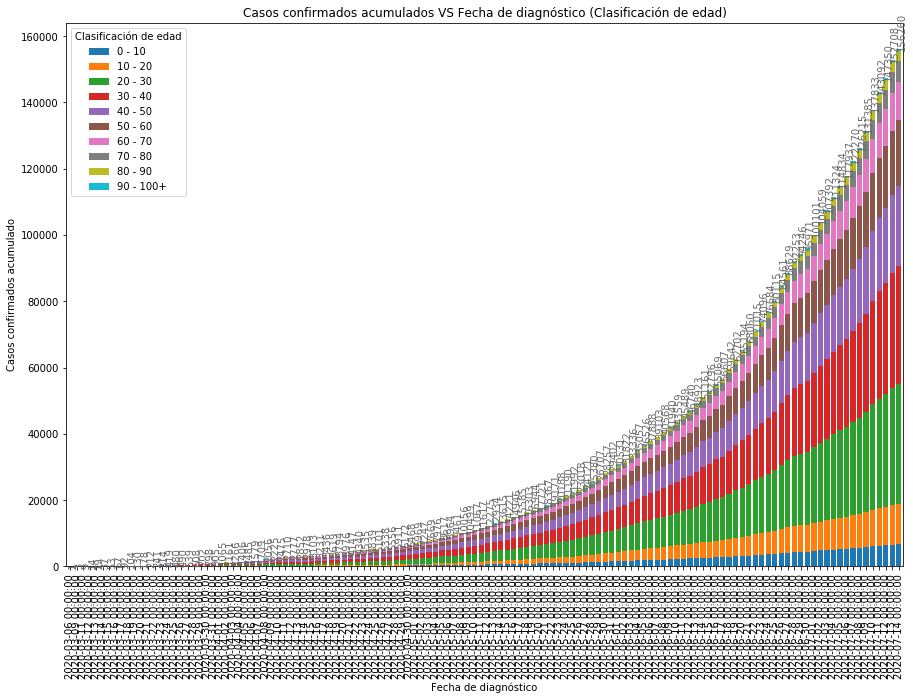

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-10            58296.0     5227.0    6961.0         844.0  318.0   
2020-07-11            62971.0     5340.0    7305.0         869.0  324.0   
2020-07-12            66809.0     5414.0    7623.0         892.0  325.0   
2020-07-13            71594.0     5470.0    8096.0         931.0  330.0   
2020-07-14            74905.0     5476.0    8311.0         951.0  330.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-10               66187.0  
2020-07-11               66283.0  
2020-07-12               66287.0  
2020-07-13               66287.0  
2020-07-14               66287.0  

[128 rows x 6 columns]

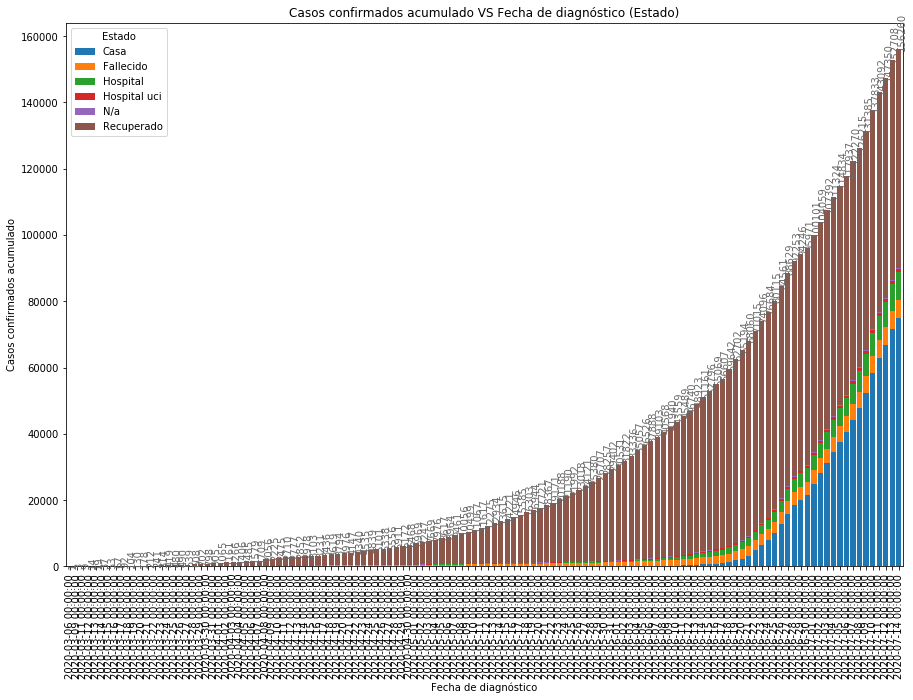

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>